In [1]:
import pandas as pd
import plotly
# Read the CSV file
df = pd.read_excel('hbv_results.xlsx')  # Assuming tab-separated based on your image


In [2]:
df.head()

,Date,Qsim,Qobs,Precipitation,Temperature,AET,PET,Snow,Snowcover,SM,Recharge,SUZ,SLZ,Q0,Q1,Q2,Unnamed: 16,Unnamed: 17,calibration,SubCatchment_1
0,1981-01-15,0.104,0.103,0.1,21.9,0.24,0.24,0,0,348511.0,0.0,0.0,4.2,0.0,0.0,0.104,NaN,NaN,Water Balance [mm/year]:,NaN
1,1981-01-16,0.107,0.100,0.1,21.9,0.24,0.24,0,0,348510.8,0.0,0.0,4.1,0.0,0.0,0.107,NaN,NaN,Sum Qsim,289.465962
2,1981-01-17,0.110,0.099,0.0,21.9,0.24,0.24,0,0,348510.6,0.0,0.0,4.0,0.0,0.0,0.110,NaN,NaN,Sum Qobs,252.337962
3,1981-01-18,0.111,0.099,0.5,21.9,0.24,0.24,0,0,348510.7,0.1,0.0,4.0,0.0,0.0,0.111,NaN,NaN,Sum Precipitation,1148.833196
4,1981-01-19,0.111,0.096,0.5,21.9,0.24,0.24,0,0,348510.8,0.1,0.0,4.0,0.0,0.0,0.111,NaN,NaN,Sum AET,86.749800


In [3]:
# Import the model
from hbv_model import HBVModel
import pandas as pd


# 1. Initialize the model
model = HBVModel()

# # 2. Load your data (either from file or DataFrame)
# # Option 1: From CSV file
model.load_data(data=df,
               date_column='Date',
               precip_column='Precipitation',
               temp_column='Temperature',
               pet_column='PET',
               obs_q_column='Qobs')  # if you have observed discharge




Time step detected: D
Loaded data with 9117 time steps, from 1981-01-15 00:00:00 to 2005-12-31 00:00:00


Parameters updated.
Initial conditions updated.
Starting model run for 9117 time steps...
Model run completed successfully!
Performance metrics calculated:
NSE: 0.822
KGE: 0.750
PBIAS: 3.0%
Correlation: 0.920
Figure saved to fig.png


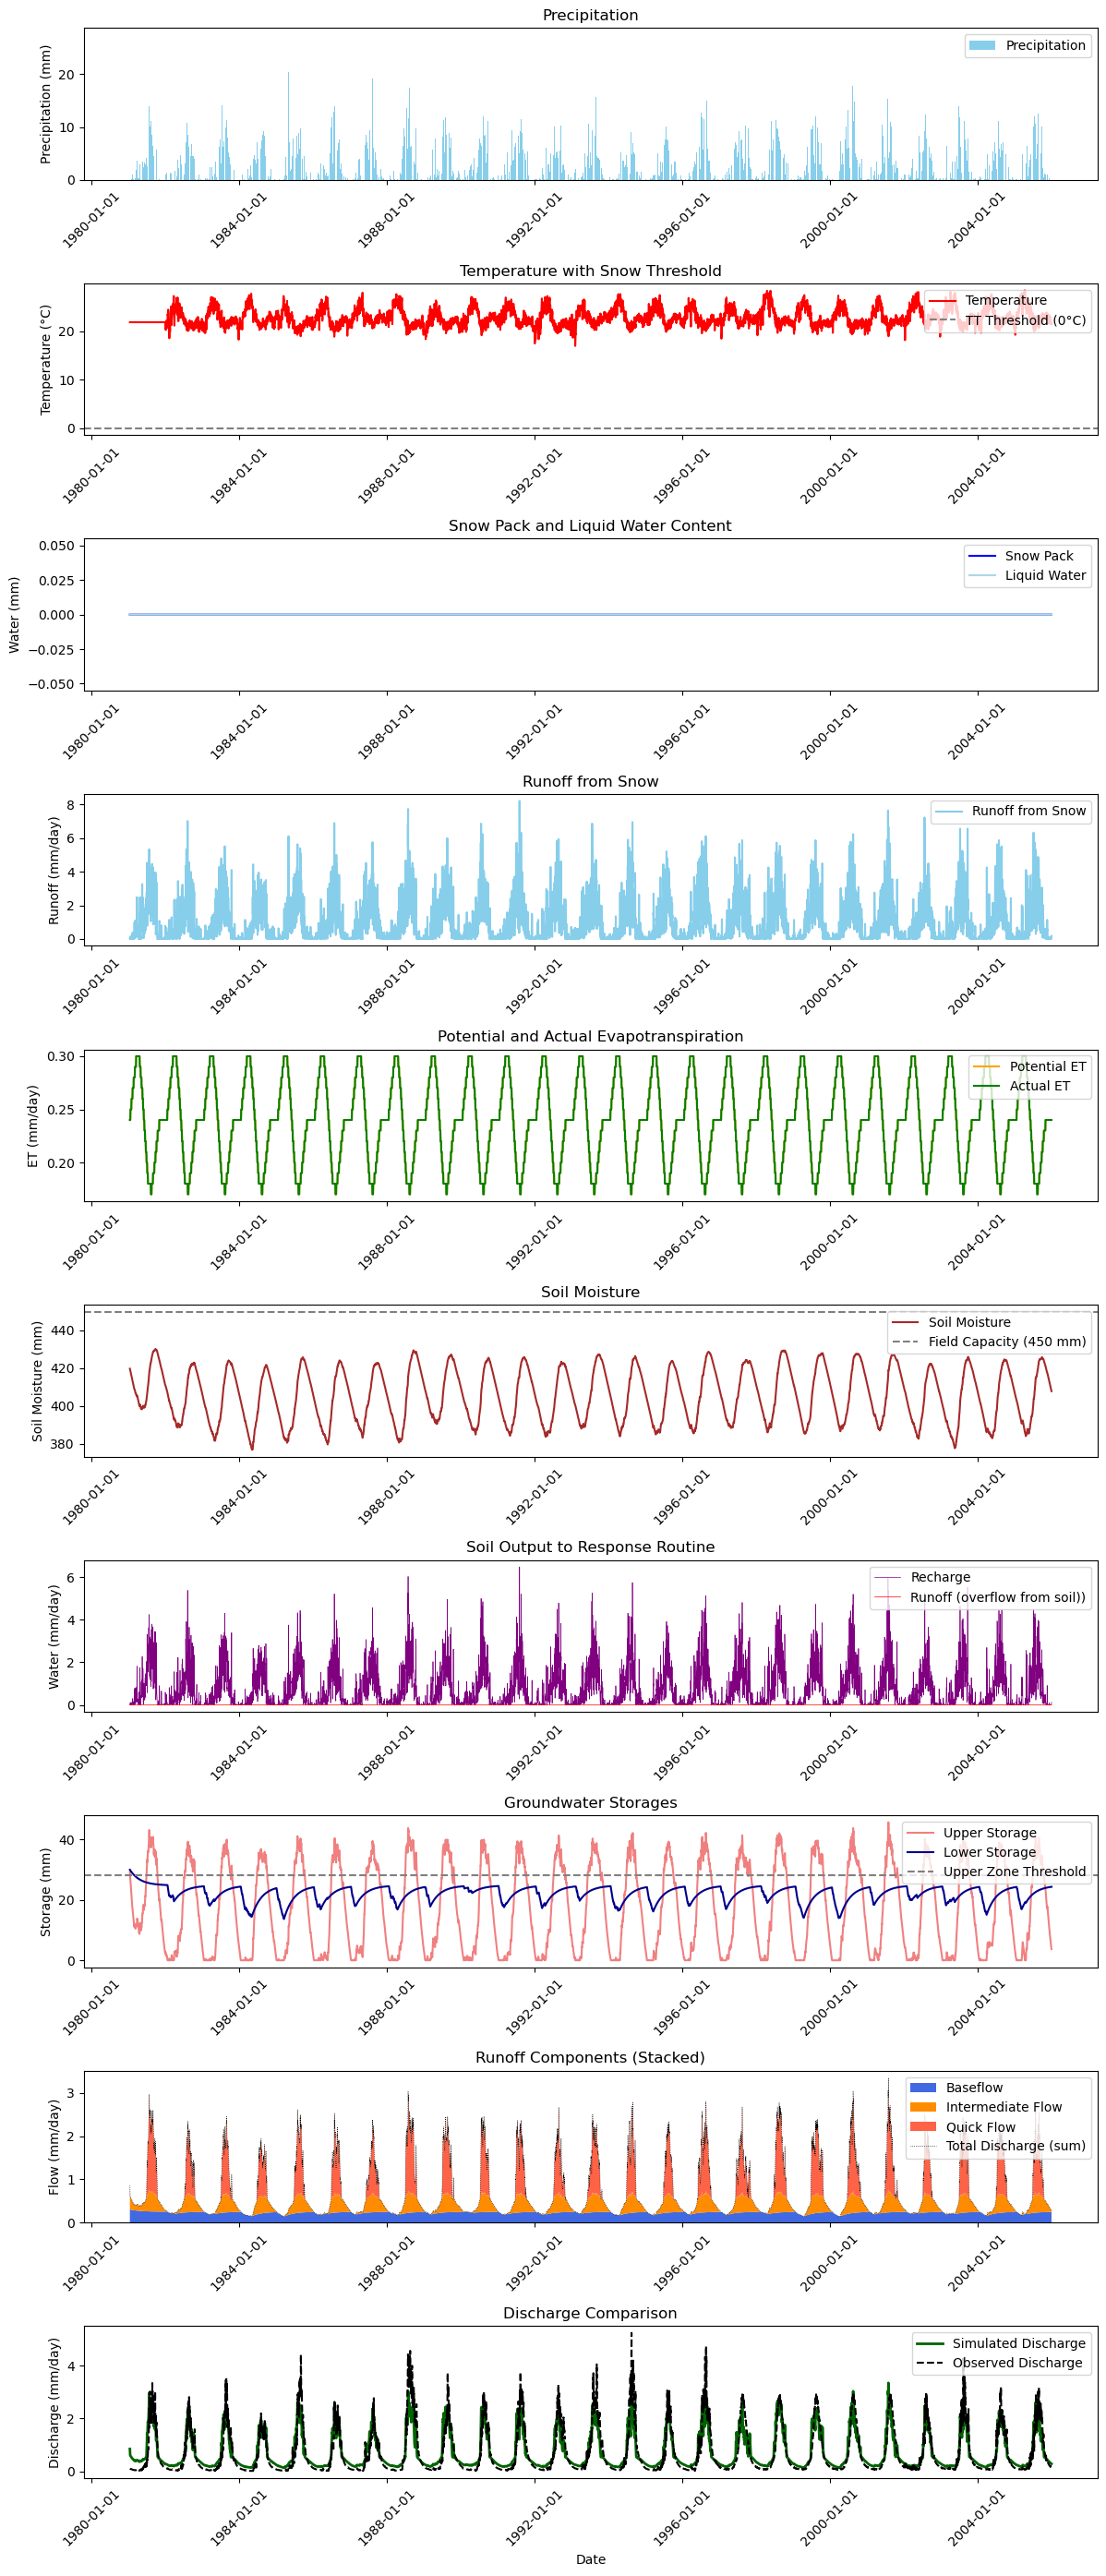

Results saved to hbv_simulation_results.csv


In [ ]:


# 3. Set parameters (optional - uses defaults if not set)
custom_params = {
    'snow': {
                'TT': 0,      # Temperature threshold for snow/rain (°C)
                'CFMAX':4,   # Degree-day factor (mm/°C/day)
                'PCF': 0.3,    # Snowfall correction factor (-)
                'SFCF': 0.3,    # Snowfall correction factor (-)
                'CFR': 0.05,    # Refreezing coefficient (-)
                'CWH': 0.1      # Water holding capacity of snow (-)
            },
            'soil': {
                'FC': 450,    # Field capacity (mm)
                'LP': 0.75,      # Limit for potential evaporation (-)
                'BETA': 3     # Shape coefficient (-)
            },
            'response': {
                'K0': 0.124,      # Quick flow recession coefficient (1/day)
                'K1': 0.011,      # Intermediate flow recession coefficient (1/day)
                'K2': 0.01,     # Baseflow recession coefficient (1/day)
                'UZL': 28,    # Upper zone threshold (mm)
                'PERC': 0.25     # Percolation rate (mm/day)
            }
        }
model.set_parameters(custom_params['snow'],custom_params['soil'],custom_params['response'])

#4. Set initial conditions (optional - uses defaults if not set)
model.set_initial_conditions(
    snowpack=0,  #initial snowpack (mm)
    liquid_water=0,    # Initial liquid water in snow (mm)
    soil_moisture= 420,  # Initial soil moisture (mm)
    upper_storage=30,   # Initial upper zone storage (mm)
    lower_storage=30  # Initial lower zone storage (mm)
)

# 5. Run the model
results = model.run()
# 6. Visualize results
model.plot_results(output_file='fig.png')

# 7. Save results to CSV (optional)
model.save_results("hbv_simulation_results.csv")
